# 初期値の影響(Xavierの初期値)
    
   
* 初期値を適度にバラつかせる方法として、Xavier Glorotらが提案する方法がある。
* Xavieの方法では、$\displaystyle \sqrt \frac{2}{n1+n2}$を標準偏差とする。ここで、n1は前の層のノード数、n2は後ろの層のノード数である。
* 以下のシミュレーションでは、sigmoid関数を使っていることに注意!!!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from common.activations import sigmoid, tanh, relu
np.random.seed(1234)

### [演習]
* Xavierの初期値を利用するための以下の関数を完成させましょう。
* def xavierのreturnに1行で書けます。

In [2]:
def xavier(n1, n2):
    """
    Xavierの初期値を利用するための関数
    返り値は、見かけの標準偏差
    n1 : 前の層のノード数
    n2 : 後ろの層のノード数
    """
    return         np.sqrt(2/(n1+n2))                             # <- 穴埋め

In [6]:
def simulation(fsigma,factivate, num_in=100, num_x=1000, hidden_layer_size=5, num_node=100):
    """
    fsigma : 標準偏差を決めるための関数
    num_in : 入力層のノードの数
    num_x : 入力するデータの数
    hidden_layer_size : 中間層の層数
    num_node : 中間層のノード数
    sigma : 乱数を抽出する際に用いる正規分布の標準偏差
    """
    # num_in次元のデータをnum_x個つくる
    X = np.random.randn(num_x, num_in) # 標準正規分布からのサンプリング

    # 中間層ノードの値を格納するdict
    h = {}

    # 順伝播の計算
    for i in range(hidden_layer_size):
        if i==0:
            X_ = X
            n1 = num_in
        else:
            X_ = h[i-1]
            n1 = num_node
        
        n2 = num_node
        sigma = fsigma(n1, n2)
        
        # 重みの初期化
        W = np.random.randn(num_node, num_node) * sigma

        # 行列の積
        z = np.dot(X_, W)

        # 活性化関数に入れる
        a = factivate(z)

        # dictに格納
        h[i] = a

    return h

def histgram(h, ymax = 100000):
    plt.figure(figsize=(14,4))
    fig_num = len(h)
    for key,value in h.items():
        plt.subplot(1,fig_num, key+1)
        plt.title("hiddlen_layer=%s"%(key+1))
        plt.hist(value.flatten(), bins=20)
        plt.ylim([0, ymax])
        plt.xlim([-1, 3.0])
        if key!=0:
            plt.yticks([], [])
    plt.show()

## Xavierの初期値でサンプリングした場合

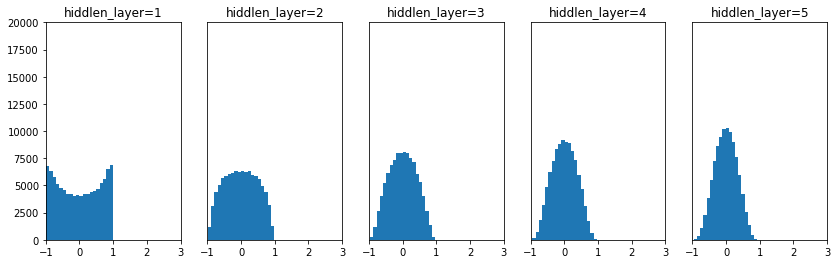

In [9]:
# 実験
n = 100
h = simulation(fsigma=xavier,factivate=tanh, num_in=n, num_node=n)

# アクティベーションのヒストグラムを中間層ごとに描く
histgram(h, ymax=20000)

## n数が大きくなった場合の確認

n=200


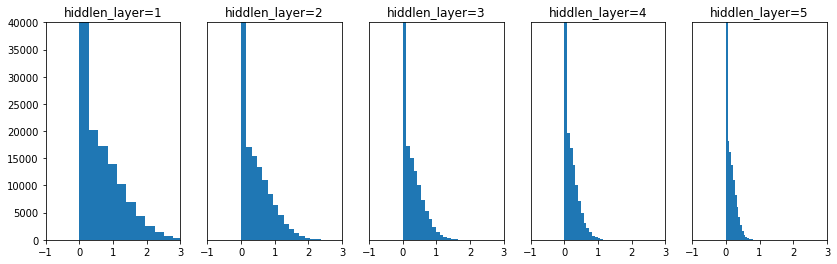

n=500


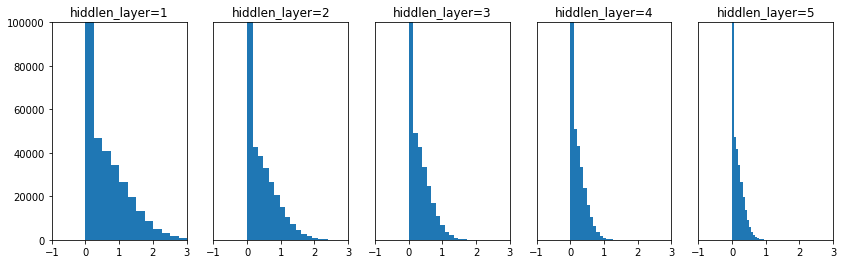

n=1000


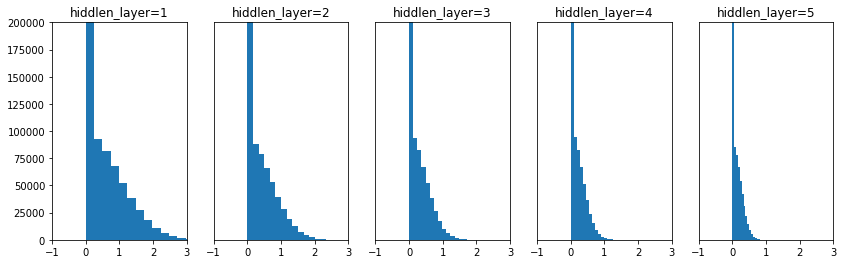

n=10000


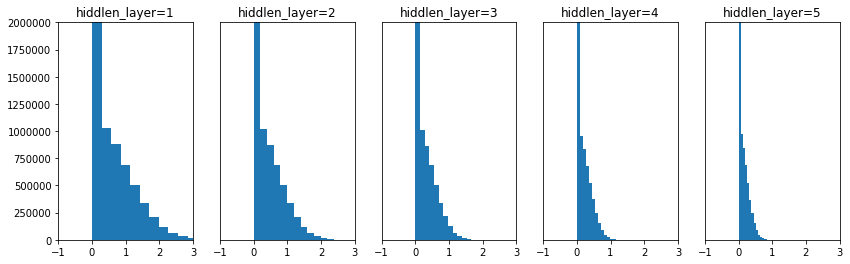

In [11]:
for n in [200, 500, 1000, 10000]:
    print("n=%s"%n)
    
    # 実験
    h = simulation(fsigma=xavier,factivate=relu, num_in=n, num_node=n)

    # アクティベーションのヒストグラムを中間層ごとに描く
    histgram(h, ymax=200*n)

### [演習]
* 活性化関数をtanhに変更し、得られた初期値について考察してみましょう
* 活性化関数をreluに変更し、得られた初期値について考察してみましょう